# Map Algebra in Python

Don't be scared – I'm not expecting you to write code. This is just to show that map algebra is really just very straightforward operations on 2D matrices. We'll use a series of very small layers with 4x6 pixels as examples.

But first, we'll load some python modules that we'll need:

In [1]:
import numpy as np        # good for dealing with matrices
import seaborn as sns     # good for nice plots 
from scipy import signal  # for the focal function
from skimage import graph # can do least cost

Let's define two layers, let's say one is ground elevation, the other one is the height of vegeation above ground:

In [2]:
elevation = np.array([ [ 1, 1, 3, 4, 4, 2],
                       [ 1, 3, 4, 4, 2, 1],
                       [ 1, 2, 2, 3, 2, 0],
                       [ 1, 1, 2, 4, 0, 0]])

vegetation = np.array([ [0, 1, 1, 1, 1, 2],
                       [ 1, 1, 1, 1, 1, 1],
                       [ 0, 1, 2, 3, 4, 0],
                       [ 0, 1, 0, 1, 0, 0]])

Text(0.5,1,'Ground elevation above sealevel')

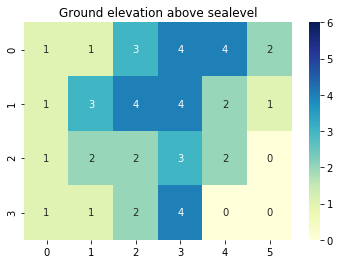

In [3]:
sns.heatmap(elevation, annot=True, cmap="YlGnBu", vmin=0, vmax=6).set_title('Ground elevation above sealevel')

Text(0.5,1,'Vegetation height above ground')

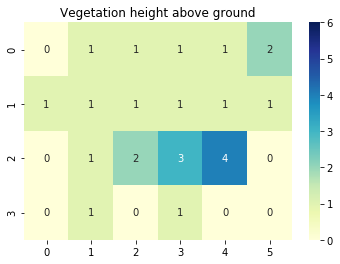

In [4]:
sns.heatmap(vegetation, annot=True, cmap="YlGnBu", vmin=0, vmax=6).set_title('Vegetation height above ground')

## Local operation: Calculate vegetation height above sea level

Text(0.5,1,'Vegetation height above sealevel')

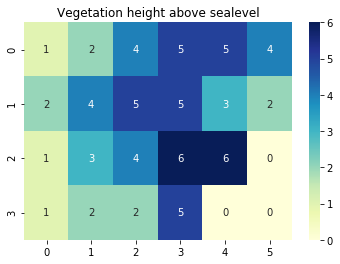

In [5]:
vegetation_above_sealevel = elevation + vegetation

sns.heatmap(vegetation_above_sealevel, annot=True, cmap="YlGnBu").set_title('Vegetation height above sealevel')

## Focal operation: Fix errors in elevation raster

Let's assume our elevation raster has a measurement error, e.g. because a bird flew under the radar, so one pixel has  a too high value:

Text(0.5,1,'Broken ground elevation above sealevel')

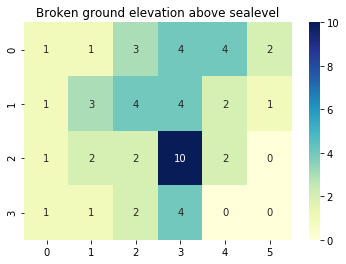

In [6]:
broken_elevation = elevation
broken_elevation[2,3] = 10

sns.heatmap(broken_elevation, annot=True, cmap="YlGnBu").set_title('Broken ground elevation above sealevel')

We'll fix this by running a 3x3 window over it that sets every pixel to the average of it's 8 neighbors:

Text(0.5,1,'Window weights')

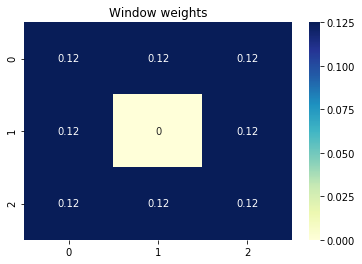

In [7]:
window = np.array([ [ 1/8., 1/8., 1/8.,],
                    [ 1/8., 0, 1/8.,],
                    [ 1/8., 1/8., 1/8.,],])

sns.heatmap(window, annot=True, cmap="YlGnBu").set_title('Window weights')


Text(0.5,1,'Fixed ground elevation above sealevel')

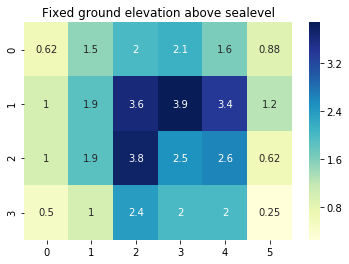

In [8]:
fixed_elevation = signal.convolve(broken_elevation, window, mode="same") # "moving window" function

sns.heatmap(fixed_elevation, annot=True, cmap="YlGnBu").set_title('Fixed ground elevation above sealevel')

Note that functions like this one always affect **all cells** (not just the "broken" one) and have **edge effects**!

## Zonal operation: Average vegetation height per zone

Let's define two zones and calculate the average vegetation height per zone:

Text(0.5,1,'Zones')

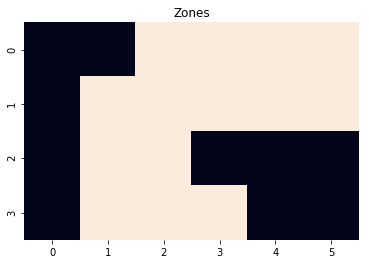

In [9]:
zones = np.array([ [0, 0, 1, 1, 1, 1],
                   [0, 1, 1, 1, 1, 1],
                   [0, 1, 1, 0, 0, 0],
                   [0, 1, 1, 1, 0, 0]])

sns.heatmap(zones, cbar=False).set_title('Zones')

Text(0.5,1,'Average vegetation height per zone')

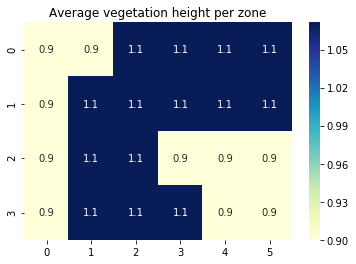

In [10]:
avg_veg_height = np.copy(zones).astype(float)

for zone in np.unique(zones):
    avg_veg_height[zones == zone] = np.mean(vegetation[zones == zone])
    
sns.heatmap(avg_veg_height, annot=True, cmap="YlGnBu").set_title('Average vegetation height per zone')

## Global operation: Cost distance

We'll use or elevation layer as a cost surface and calculate the cost to travel to each cell from a given start cell.

Text(0.5,1,'Least cost distance to travel to cell at [1,3]')

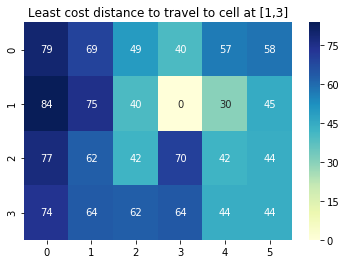

In [11]:
# turn our elevation into a cost surface
cellSize = 10
lg = graph.MCP_Geometric(elevation, sampling=(cellSize, cellSize))

# Calculate the least-cost distance from the start cell to all other cells
lcd = lg.find_costs(starts=[(1, 3)])[0]
sns.heatmap(lcd, annot=True, cmap="YlGnBu").set_title('Least cost distance to travel to cell at [1,3]')